In [73]:
%reset -f
import numpy as np
import tensorflow as tf 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras.layers import concatenate
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow import keras
from tensorflow.keras import layers

# modèle Discriminateur

In [74]:
def f_discriminateur(y1,y2):
    s = np.zeros(np.size(y1))
    for i in range(np.size(y1)):
        if (y1[i] == y2[i]**2):
            s[i] = 1
        else:
            s[i] = 0
    return s

In [75]:
seed = 7
np.random.seed(seed)

N = 1000

y_train1 = np.linspace(-0.5,0.5,N)
y_train2 = np.random.rand(N)
y_train2 -= 0.5
y_train2 = np.sort(y_train2)
s_train = f_discriminateur(y_train1,y_train2)

In [76]:
y_train= np.zeros((N,2))

In [77]:
for i in range(N):
    y_train[i] = [y_train1[i],y_train2[i]]

In [78]:
y_train.shape

(1000, 2)

In [79]:
s_train.shape

(1000,)

In [80]:
# Define Sequential model with 3 layers
model_discr = keras.Sequential(
    [
        layers.Dense(64, input_dim = 2, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)


In [81]:
#compile the model and compute the parameters of the model
model_discr.compile(optimizer='adam',loss='binary_crossentropy', loss_weights=[1,1],metrics='mse')


In [82]:
# model_discr.fit(y_train,s_train,epochs=300,batch_size=32)

Epoch 1/300
32/32 [==============================] - 0s 7ms/step - loss: 0.5556 - mse: 0.1829
Epoch 2/300
32/32 [==============================] - 0s 3ms/step - loss: 0.1150 - mse: 0.0187
Epoch 3/300
32/32 [==============================] - 0s 3ms/step - loss: 0.0038 - mse: 2.7658e-05
Epoch 4/300
32/32 [==============================] - 0s 3ms/step - loss: 8.9195e-04 - mse: 1.2967e-06
Epoch 5/300
32/32 [==============================] - 0s 3ms/step - loss: 4.3787e-04 - mse: 3.1173e-07
Epoch 6/300
32/32 [==============================] - 0s 3ms/step - loss: 2.6100e-04 - mse: 1.1166e-07
Epoch 7/300
32/32 [==============================] - 0s 3ms/step - loss: 1.7296e-04 - mse: 4.9703e-08
Epoch 8/300
32/32 [==============================] - 0s 3ms/step - loss: 1.2271e-04 - mse: 2.5193e-08
Epoch 9/300
32/32 [==============================] - 0s 3ms/step - loss: 9.1431e-05 - mse: 1.4208e-08
Epoch 10/300
32/32 [==============================] - 0s 4ms/step - loss: 7.0575e-05 - mse: 8.5117e-09

KeyboardInterrupt: 

# modèle Générateur G

In [84]:
X_train = np.linspace(-0.5,0.5,N)
y_train = X_train**2
x_val = np.random.rand(N)
x_val -= 0.5
x_val = np.sort(x_val)
y_val = x_val**2

In [85]:
latent_dim = 5

In [86]:
# Define Sequential model with 3 layers
model_gen = keras.Sequential(
    [
        layers.Dense(64, input_dim = latent_dim,activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(2, activation="linear")
    ]
)


In [87]:
#compile the model and compute the parameters of the model
model_gen.compile(optimizer='adam',loss='binary_crossentropy',metrics='mse')

# modèle GAN

In [88]:
model_gan = tf.keras.models.Sequential([model_gen, model_discr])
model_gan.compile(optimizer='adam',loss='binary_crossentropy')

# fonction génération vraies valeurs

In [89]:
def generate_reel_samples(n):
    X_train = np.random.rand(n)
    X_train -= 0.5
    X_train = np.sort(X_train)
    y_train = X_train**2
    X = np.zeros((n,2))
    for i in range(n):
        X[i][0] = X_train[i]
        X[i][1] = y_train[i]
    s = np.ones(n)
    res = (X,s)
    return res

In [90]:
y_test6252 = generate_reel_samples(32)

In [91]:
y_test6252

(array([[-4.44211955e-01,  1.97324261e-01],
        [-4.04616795e-01,  1.63714751e-01],
        [-3.81654977e-01,  1.45660521e-01],
        [-2.93761634e-01,  8.62958977e-02],
        [-2.86402697e-01,  8.20265051e-02],
        [-2.55985199e-01,  6.55284219e-02],
        [-1.72072754e-01,  2.96090328e-02],
        [-1.67193693e-01,  2.79537311e-02],
        [-1.58540663e-01,  2.51351417e-02],
        [-1.52581226e-01,  2.32810305e-02],
        [-1.46612913e-01,  2.14953463e-02],
        [-1.33614118e-01,  1.78527326e-02],
        [-3.76444274e-02,  1.41710291e-03],
        [ 1.45216455e-03,  2.10878189e-06],
        [ 5.89803668e-03,  3.47868366e-05],
        [ 3.76210021e-02,  1.41533980e-03],
        [ 4.71771667e-02,  2.22568506e-03],
        [ 1.33756741e-01,  1.78908658e-02],
        [ 1.51076531e-01,  2.28241184e-02],
        [ 1.72962985e-01,  2.99161943e-02],
        [ 1.90020662e-01,  3.61078519e-02],
        [ 1.92591096e-01,  3.70913302e-02],
        [ 1.95803306e-01,  3.833

# fonction génération de fausses valeurs

In [92]:
def generate_fake_samples(generator,latent_dim,n):
    X_train = np.random.rand(n,latent_dim)
    X_train -= 0.5
    X_train = np.sort(X_train)
    X = np.zeros((n,latent_dim))
    X = generator.predict(X_train)
    s = np.zeros(n)
    return (X,s)

In [93]:
y_test54 = generate_fake_samples(model_gen,5,32)

In [94]:
model_discr.trainable = False

# test 

In [96]:
# vraies valeurs:
# plt.subplot(1,2)
plt.scatter(y_test6252[:,0],y_test6252[:,1],c='r')
plt.title('true sample')

# fake valeurs:
# plt.subplot(2,2)
plt.scatter(y_test54[:,0],y_test54[:,1],c='b')
plt.title('fake sample')


TypeError: tuple indices must be integers or slices, not tuple

# mise en relation

coucou 0


FileNotFoundError: [Errno 2] No such file or directory: 'imgs_gen_samples/0.png'

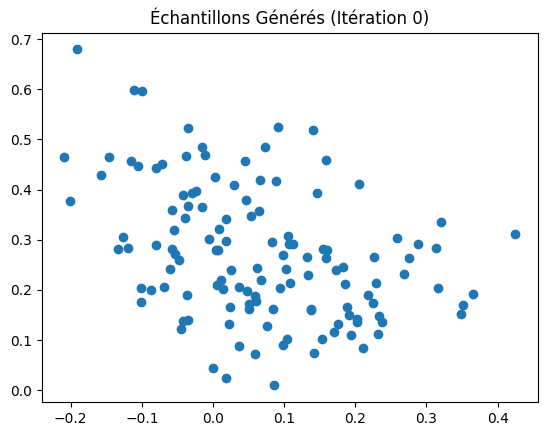

In [97]:
N_iter = 10000
n_batch = 128
latent_dim = 5


# model_discr.fit(y_train,s_train,epochs=300,batch_size=32)
# model_discr.trainable = False

for i in range(N_iter):
    # generation des donnees
    X_true,s_true = generate_reel_samples(n_batch//2)
    X_fake, s_fake = generate_fake_samples(model_gen,latent_dim,n_batch//2)
    
    X = np.concatenate((X_true,X_fake))
    s = np.concatenate((s_true,s_fake))
    
    
    #entrainement du discriminateur
    model_discr.trainable = True
    model_discr.train_on_batch(X,s)
    model_discr.trainalbe = False
    
    # generation du bruit
    noise = np.random.randn(n_batch,latent_dim)
    
    # on veut que des un en sortie
    y = np.ones(n_batch)
    
    # entrainement du gan
    model_gan.train_on_batch(noise,y)
    print("coucou", i)
    
    if (i % 200 == 0):
        noise = np.random.randn(n_batch, latent_dim)
        y_gen = model_gen.predict(noise)
        plt.scatter(y_gen[:,0],y_gen[:,1])
        plt.title(f'Échantillons Générés (Itération {i})')
        plt.savefig(f'imgs_gen_samples/{i}.png')
        plt.close()  # Fermer le graphique après la sauvegarde

# test gan

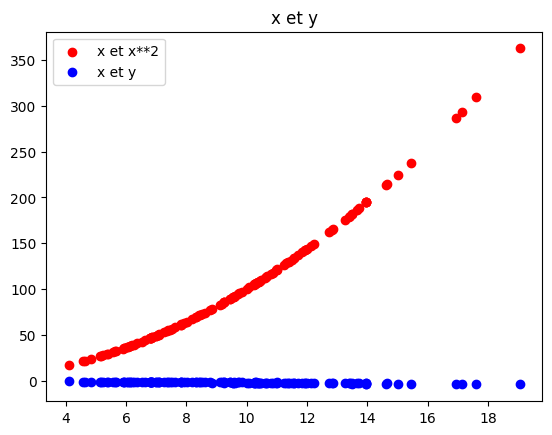

In [72]:
np.random.seed(42)
tf.random.set_seed(42)

noise = np.random.randn(n_batch, latent_dim)
y_gen = model_gen.predict(noise)

# courbe vraie valeur
plt.scatter(y_gen[:,0],y_gen[:,0]**2,label='x et x**2',c='r')
plt.title('x et x**2')

# courbe valeur entrainee
plt.scatter(y_gen[:,0],y_gen[:,1],label='x et y',c='b')
plt.title('x et y')

plt.legend()  # Ajoute une légende pour distinguer les deux scatter plots
plt.show()